<u>Phase 3 Project</u>
 - Name;Joseph Mulwa Mukungi
 - TM;Daniel Ekale 

<h3 style="color:rgb(84, 50, 223);">Data Understanding </h3>

<u><h4 style="color:rgb(14, 218, 129);" >Context </h4> </u>  
An international e-commerce company based in Kenya  wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products  

The data contains the following information:

* ID: ID Number of Customers.
* Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
* Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
* Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
* Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
* Cost of the product: Cost of the Product in US Dollars.
* Prior purchases: The Number of Prior Purchase.
* Product importance: The company has categorized the product in the various parameter such as low, medium, high.
* Gender: Male and Female.
* Discount offered: Discount offered on that specific product.
* Weight in gms: It is the weight in grams.
* Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

 <b> Data Source </b>  
 The data set was downloaded from [driven Data Competition][Data]

[Data]: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/ 

<u> Objective of the Analysis </u>

What was Customer Rating?   
And was the product delivered on time?
Is Customer query is being answered?  
If Product importance is high. having higest rating or being delivered on time?

#### Import Libraries 

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score, recall_score,f1_score,precision_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

## 1.EDA

In [27]:
df = pd.read_csv("Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [28]:
#Checking our data shape
df.shape

(10999, 12)

In [29]:
#Data types
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [31]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [32]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


#### Data Visualization

C:\Users\mulwa\AppData\Local\Temp\ipykernel_21740\3877899328.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer_rating', data=df, palette='viridis')


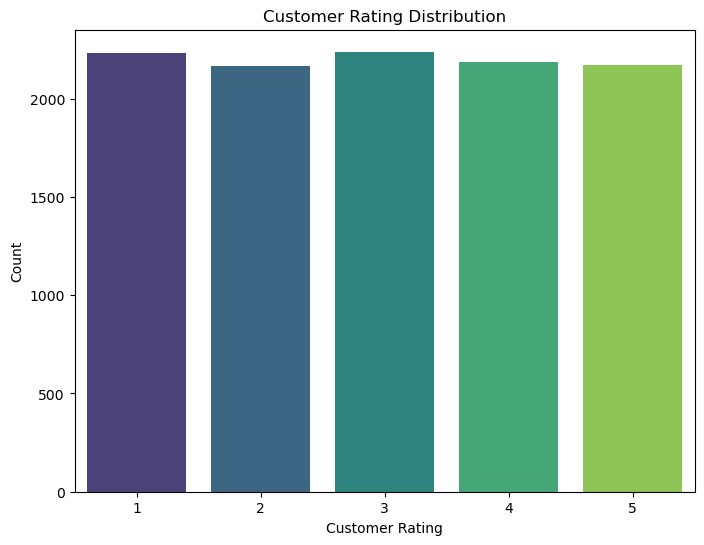

In [33]:
# Objective 1: Customer Rating Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer_rating', data=df, palette='viridis')
plt.title('Customer Rating Distribution')
plt.xlabel('Customer Rating')
plt.ylabel('Count')
plt.show() 

#From our plot we can see that most customers rated the products 3

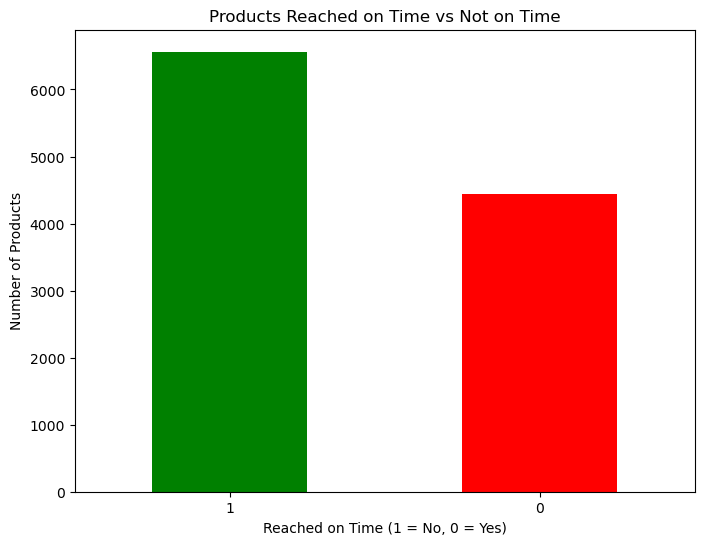

In [34]:
#Objective 2;Was trthe product delivered on time?
on_time_counts = df['Reached.on.Time_Y.N'].value_counts()

plt.figure(figsize=(8, 6))
on_time_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Products Reached on Time vs Not on Time")
plt.xlabel("Reached on Time (1 = No, 0 = Yes)")
plt.ylabel("Number of Products")
plt.xticks(rotation=0)
plt.show()

# From our plot we can see that most products didnt reach on time

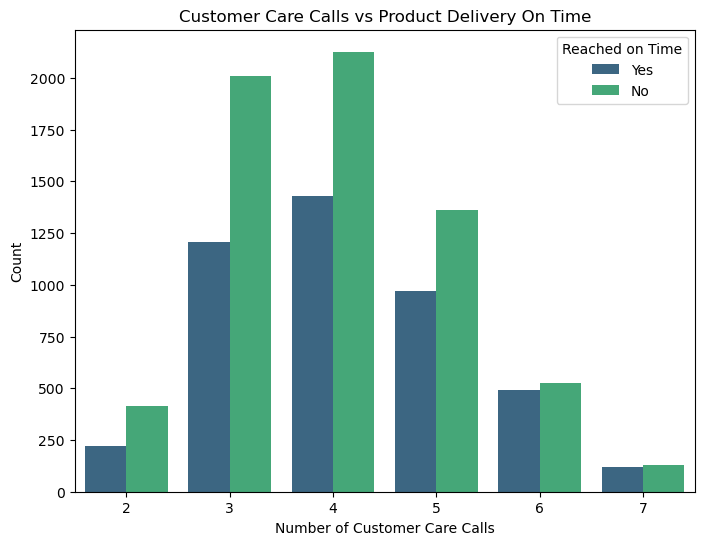

In [35]:
# Objective 3: Is Customer query being answered?
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer_care_calls', hue='Reached.on.Time_Y.N', data=df, palette='viridis')
plt.title('Customer Care Calls vs Product Delivery On Time')
plt.xlabel('Number of Customer Care Calls')
plt.ylabel('Count')
plt.legend(title='Reached on Time', labels=['Yes', 'No'])
plt.show()

#From our plot we can see that most products that were delivered on time had 4 customer care calls

In [36]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


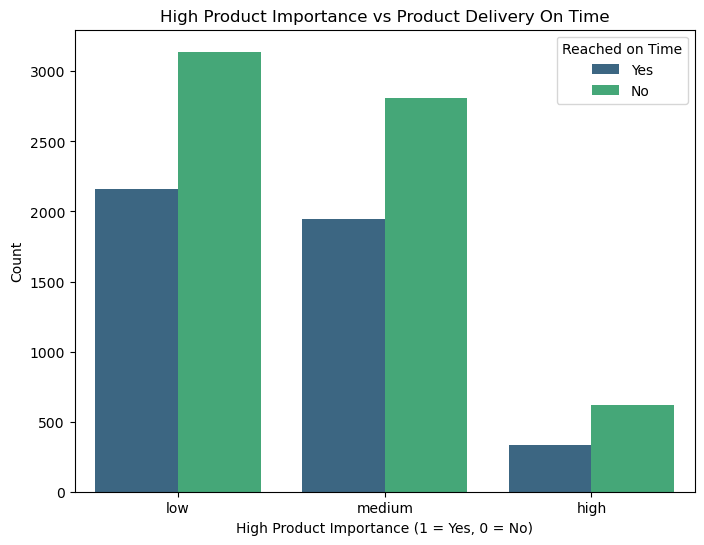

In [37]:
# Objective 4: If Product importance is high, having highest rating or being delivered on time?
plt.figure(figsize=(8, 6))
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=df, palette='viridis')
plt.title('High Product Importance vs Product Delivery On Time')
plt.xlabel('High Product Importance (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Reached on Time', labels=['Yes', 'No'])
plt.show()

#from our plot we can see that most products that were delivered on time had high product importance

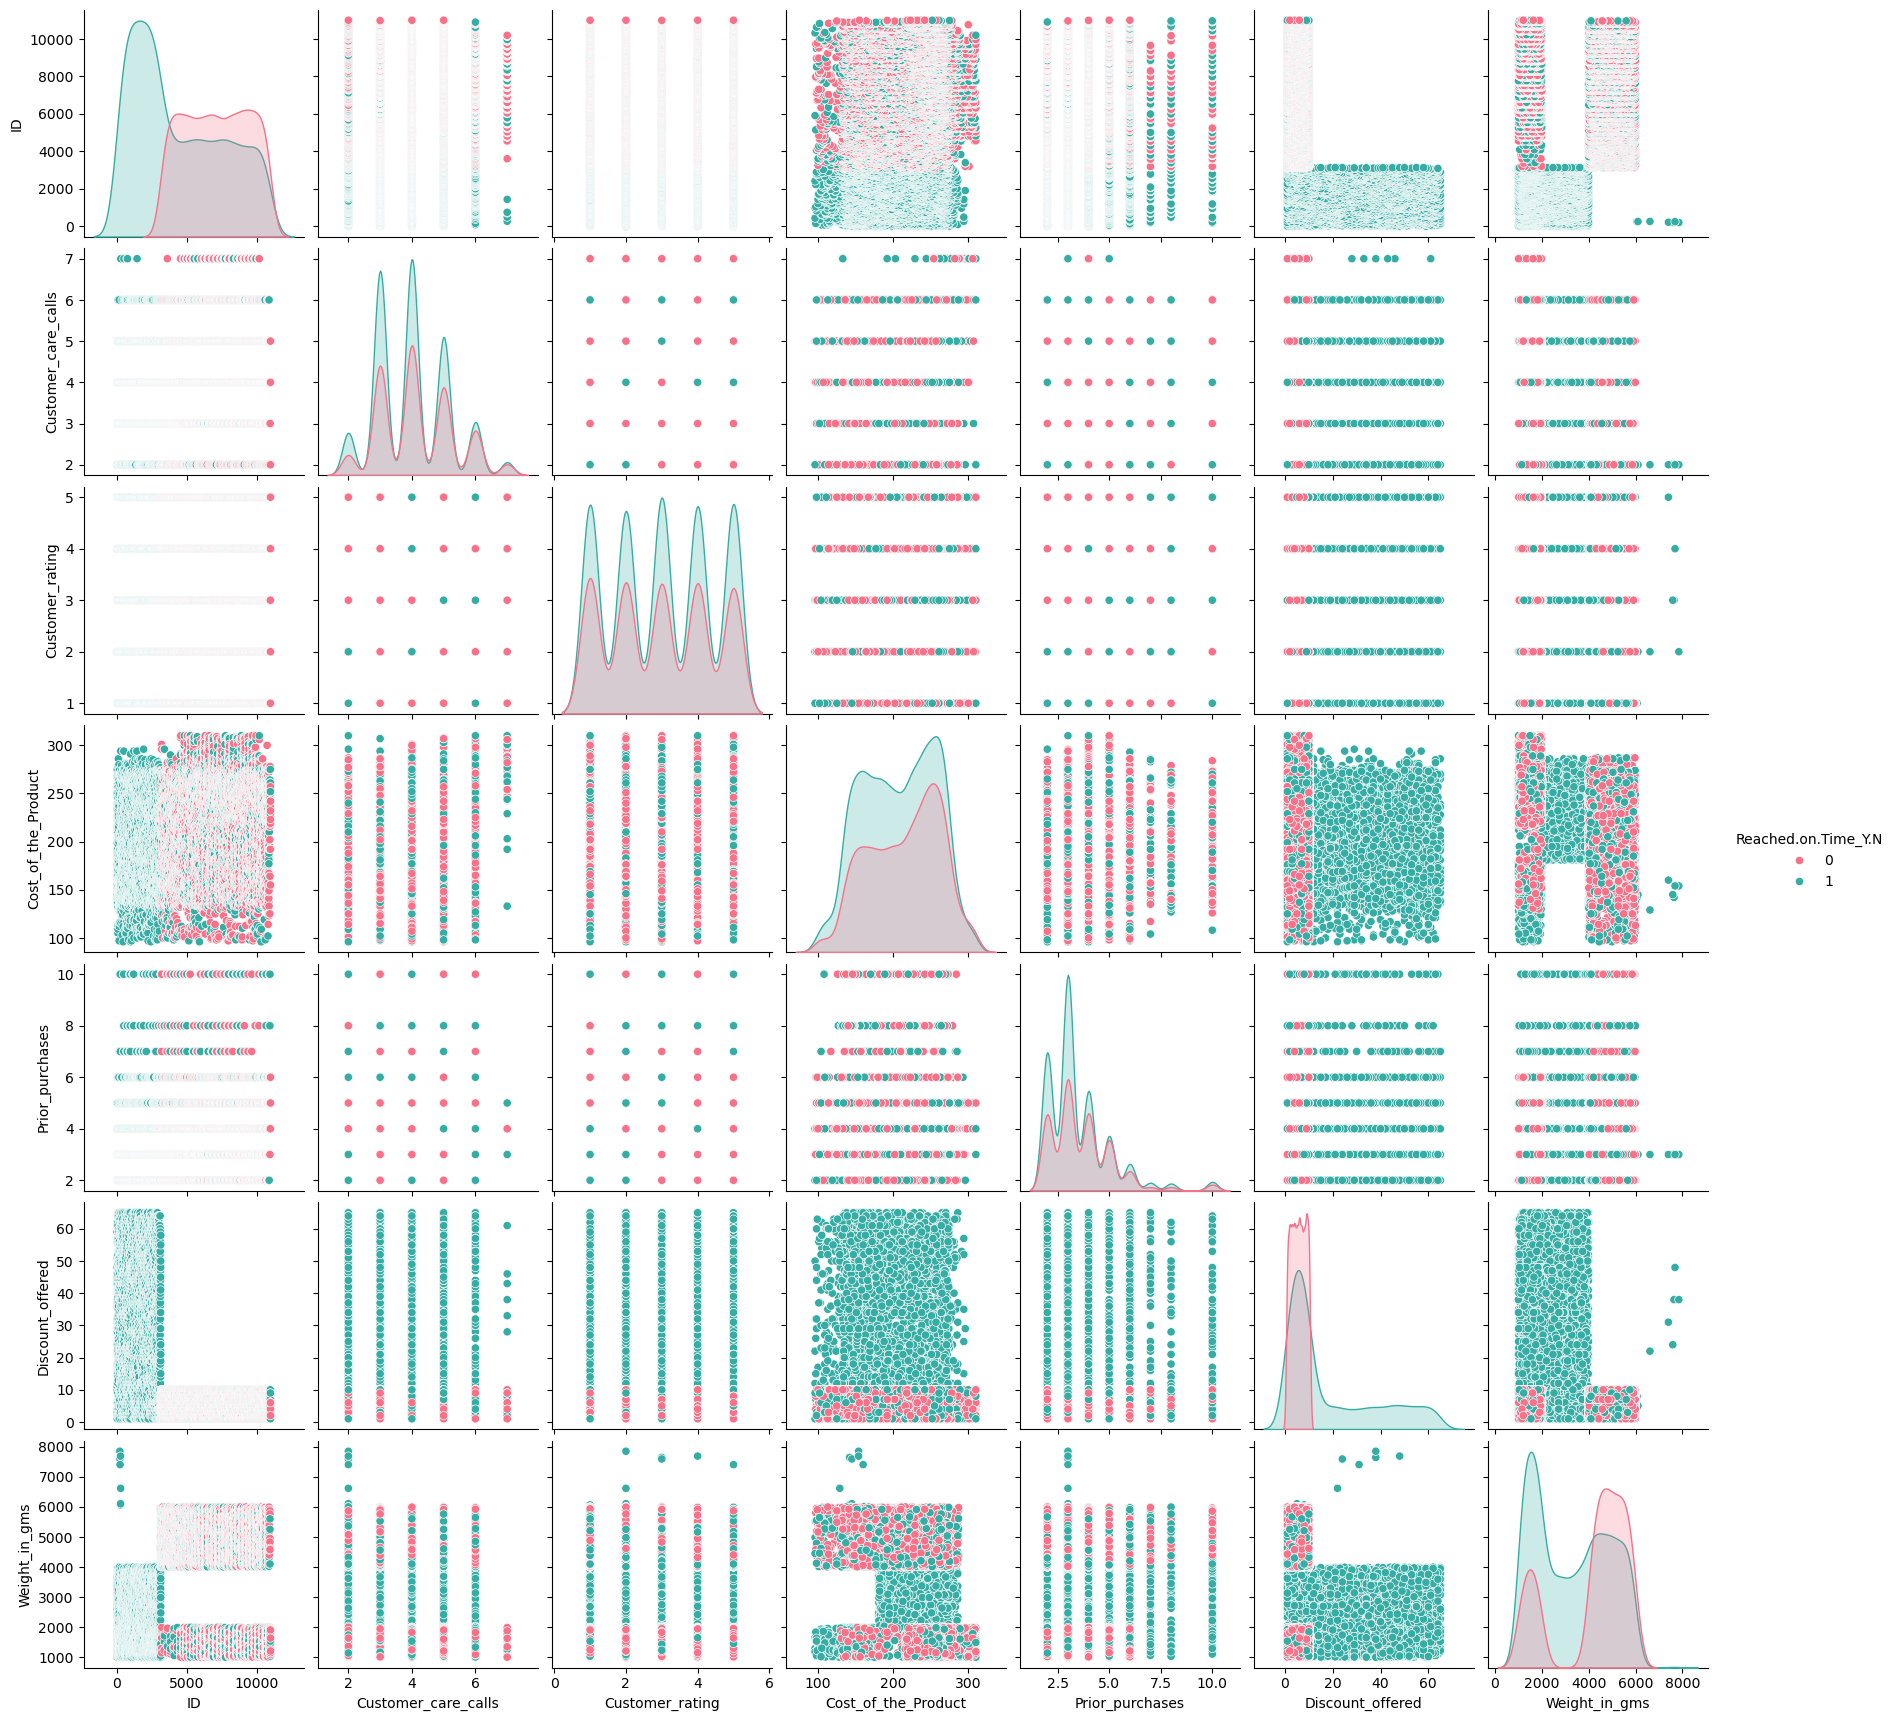

In [38]:
#A pairplot 
sns.pairplot(df, hue="Reached.on.Time_Y.N", diag_kind="kde", palette="husl")

plt.show()

#Discount Offered has highest classification power

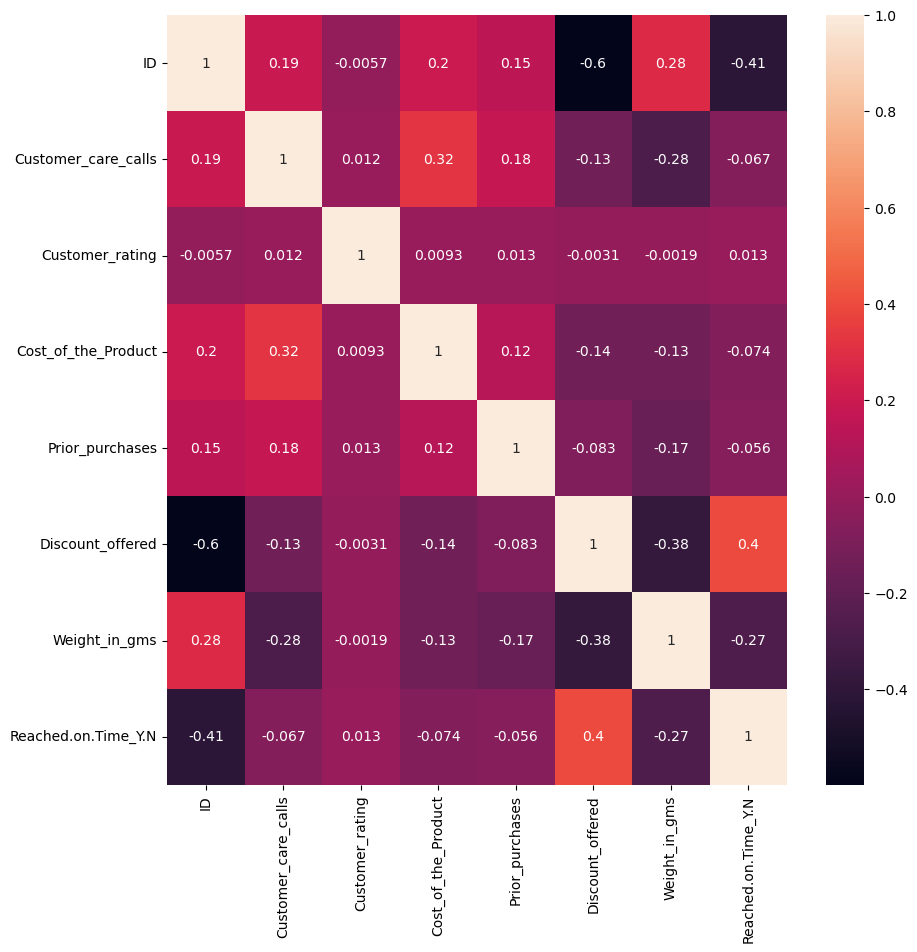

In [39]:
#Correlation heatmap
numeric_df =  df.select_dtypes(include ='number')
fig = plt.figure(figsize=(10,10))
sns.heatmap(numeric_df.corr(),annot = True)
plt.show()

### One Hot Encoding  
 -  for our Gender, Warehouse and mode of transport data since they are categorical data

In [40]:
categorical = ['Warehouse_block', 'Mode_of_Shipment','Product_importance','Gender']
encoded = OneHotEncoder(sparse_output=False)
feature_array = encoded.fit_transform(df[categorical])
feature_labels = encoded.get_feature_names_out(categorical)

#A dataframme of the one hot encoded features
features = pd.DataFrame(feature_array,columns=feature_labels)
features.head()

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [41]:
#Concat Data and Features and dropping all original categorical columns 
df =  pd.concat([df,features], axis=1)
df.drop(categorical,axis=1,inplace=True)

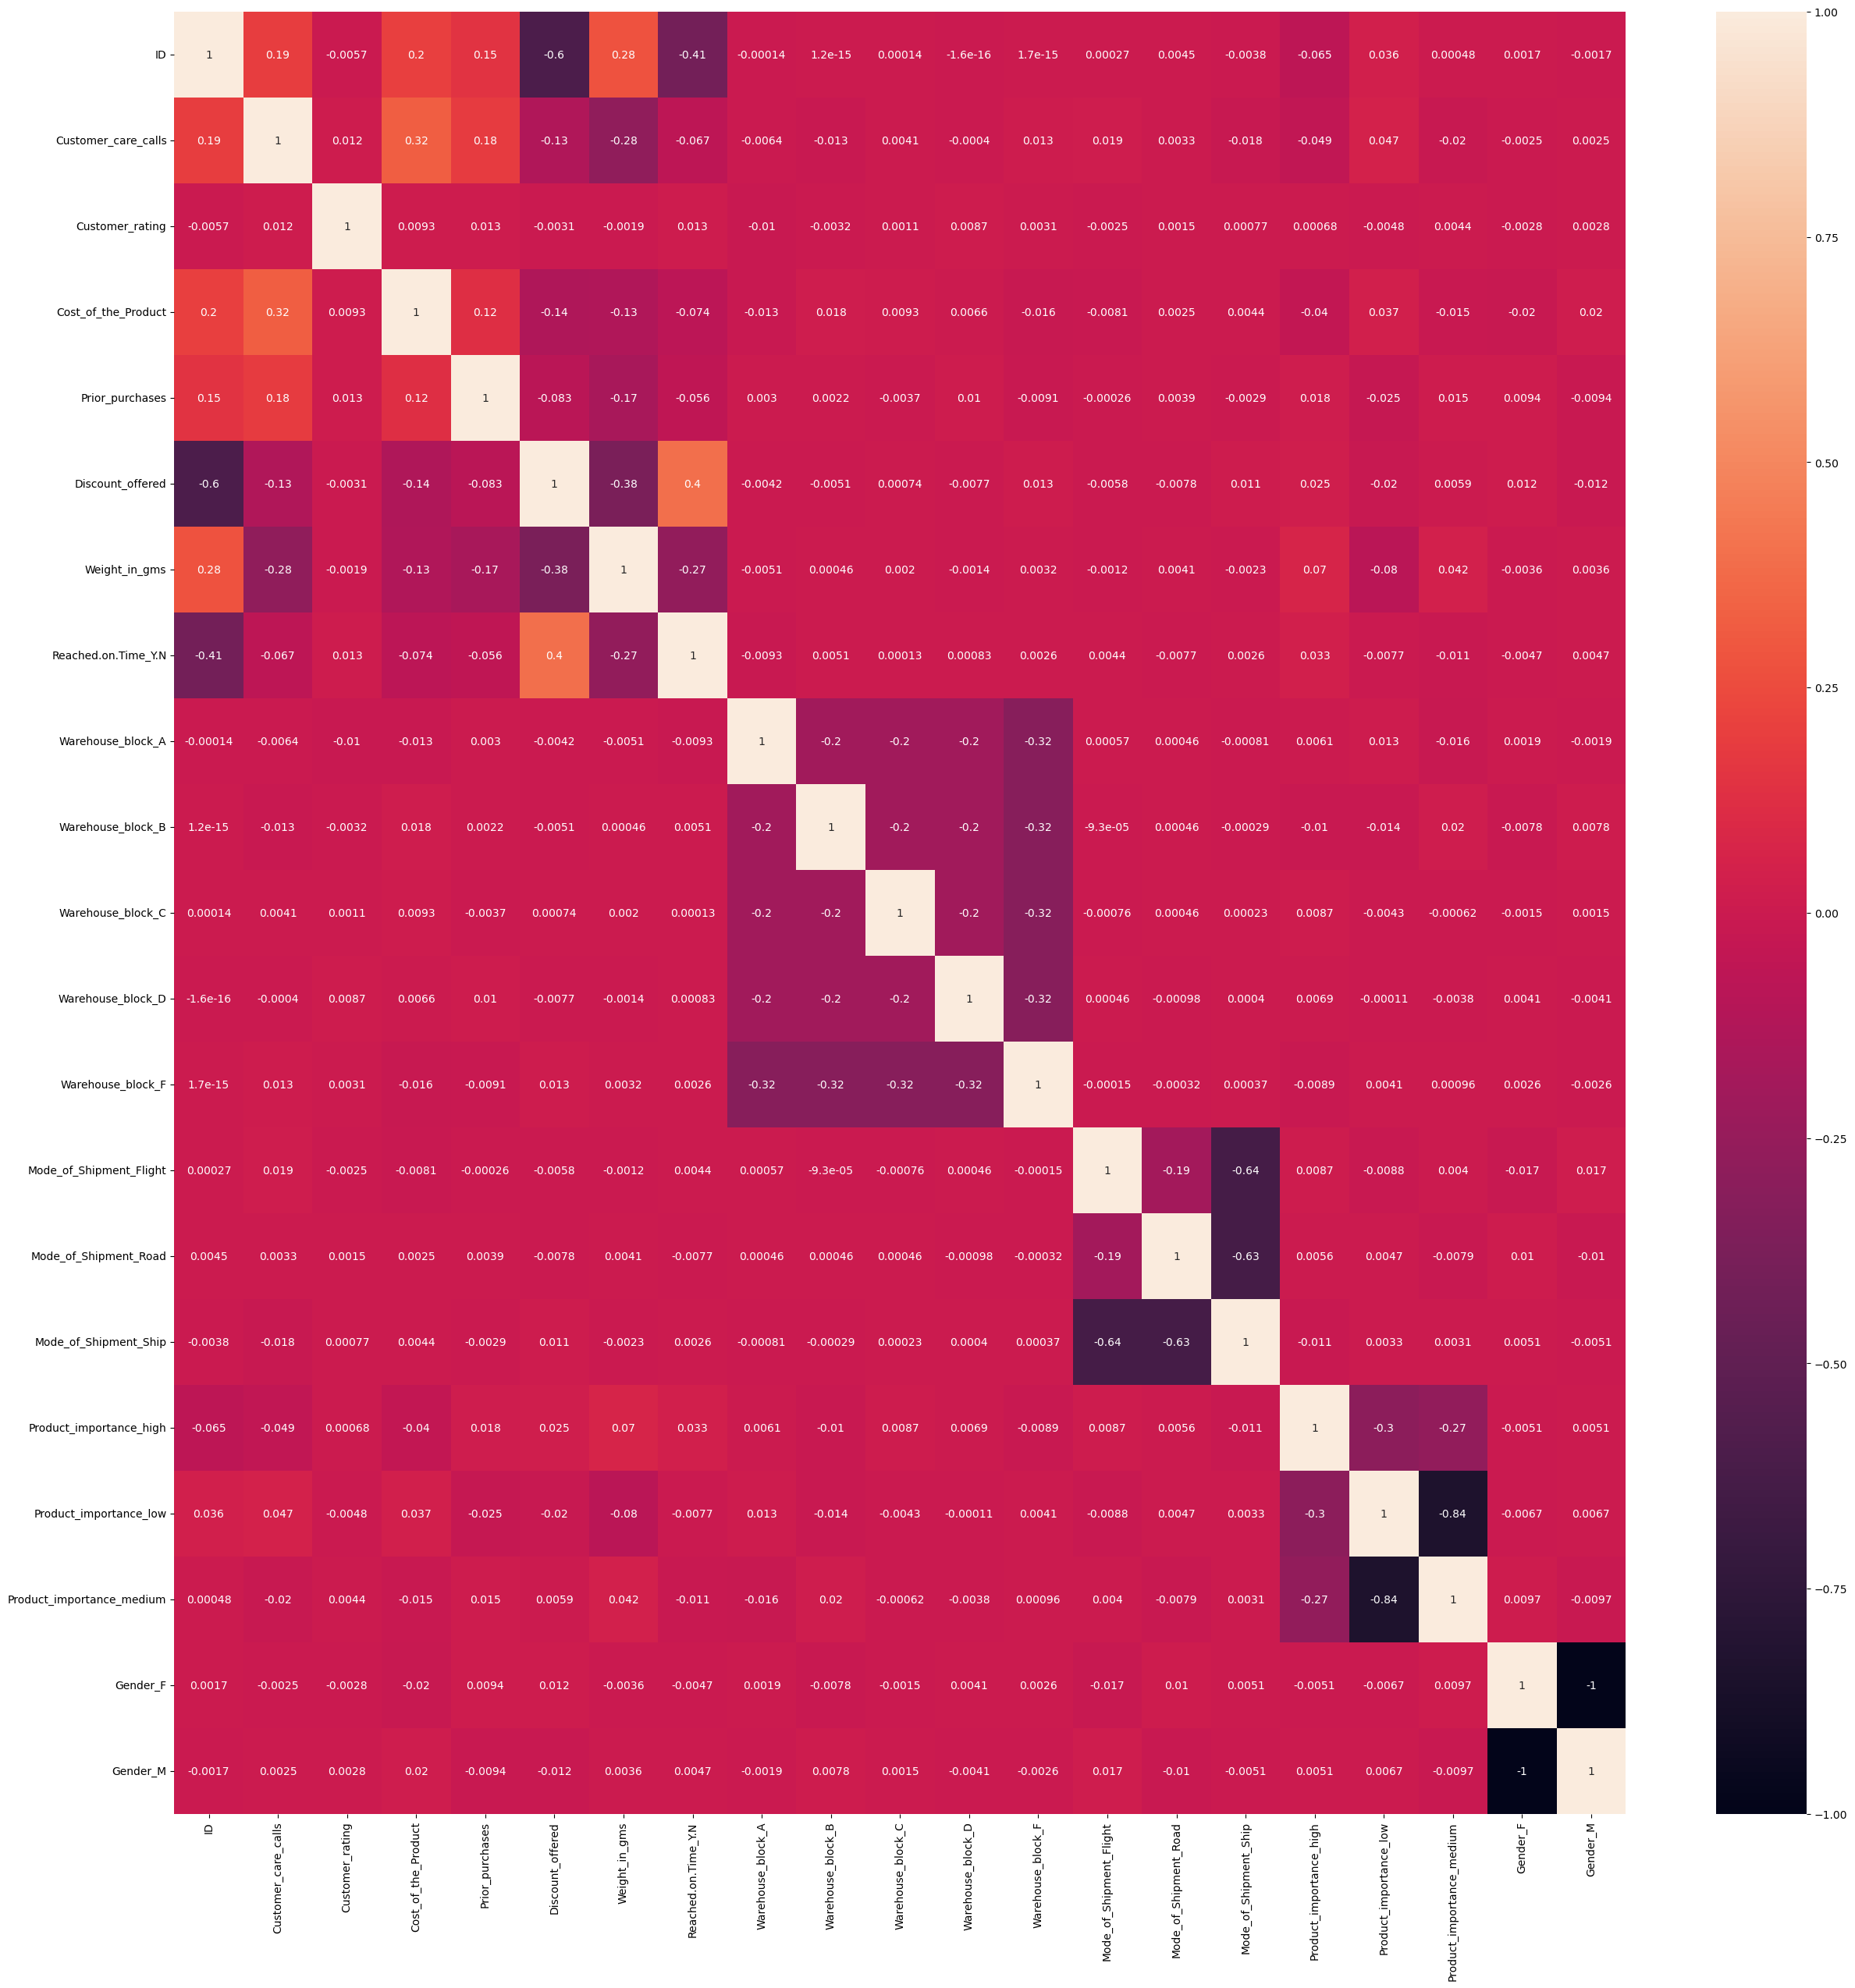

In [42]:
#Heatmap
fig = plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [43]:
corre = df.corr()["Reached.on.Time_Y.N"]
# sorted_corre= corre.abs().sort_values(ascending=False)
# pd.set_option('display.max_rows', None)
print(corre)

ID                          -0.411822
Customer_care_calls         -0.067126
Customer_rating              0.013119
Cost_of_the_Product         -0.073587
Prior_purchases             -0.055515
Discount_offered             0.397108
Weight_in_gms               -0.268793
Reached.on.Time_Y.N          1.000000
Warehouse_block_A           -0.009317
Warehouse_block_B            0.005106
Warehouse_block_C            0.000132
Warehouse_block_D            0.000830
Warehouse_block_F            0.002568
Mode_of_Shipment_Flight      0.004371
Mode_of_Shipment_Road       -0.007671
Mode_of_Shipment_Ship        0.002577
Product_importance_high      0.033242
Product_importance_low      -0.007667
Product_importance_medium   -0.011099
Gender_F                    -0.004689
Gender_M                     0.004689
Name: Reached.on.Time_Y.N, dtype: float64


#### Modelling

In [44]:
#Splitting dataset 
X = df.drop("Reached.on.Time_Y.N", axis = 1)
y = df["Reached.on.Time_Y.N"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [45]:
#Scaling 
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

##### Logistic Regression 

with sk learn

Train Accuracy: 0.6395044891464939
Accuracy score: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.56      0.56       895
           1       0.70      0.70      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



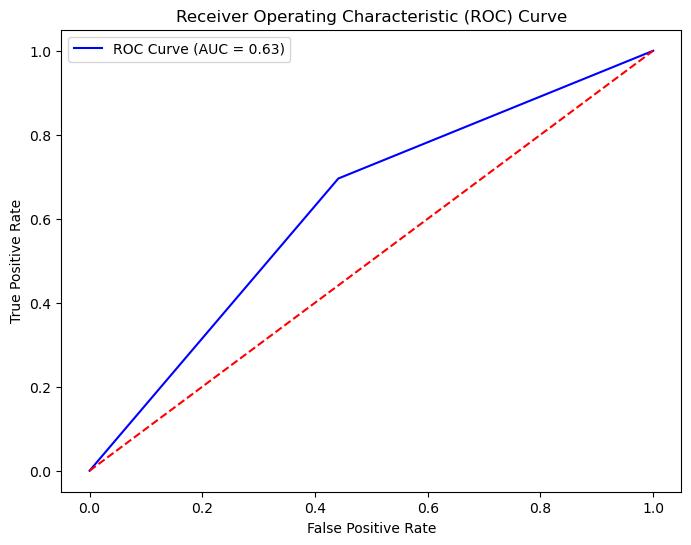

In [65]:
testing = df.drop("Reached.on.Time_Y.N", axis=1).select_dtypes('number')

clf = LogisticRegression(max_iter = 1000)
clf.fit(X_train, y_train)
y_train_preds = clf.predict(X_train)
y_test_preds = clf.predict(X_test)

#The fpr and tpr 
fpr, tpr, _ = roc_curve(y_test, y_test_preds)
auc = roc_auc_score(y_test, y_test_preds)

accuracylogisticsklearn = accuracy_score(y_test, y_test_preds)
print("Train Accuracy:", accuracy_score(y_train, y_train_preds))
print("Accuracy score:",accuracylogisticsklearn)
print("Classification Report:\n", classification_report(y_test, y_test_preds))

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

the correct prediction made by the model on test set = 65.2%.Need to increase it 
Recall_score shows how our model identifies positive intances of the target class =68% need to increase it 

#### Decision trees

Train Accuracy: 1.0
Accuracy score: 0.6495454545454545
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.55      0.56       895
           1       0.70      0.72      0.71      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.63      0.63      2200
weighted avg       0.65      0.65      0.65      2200



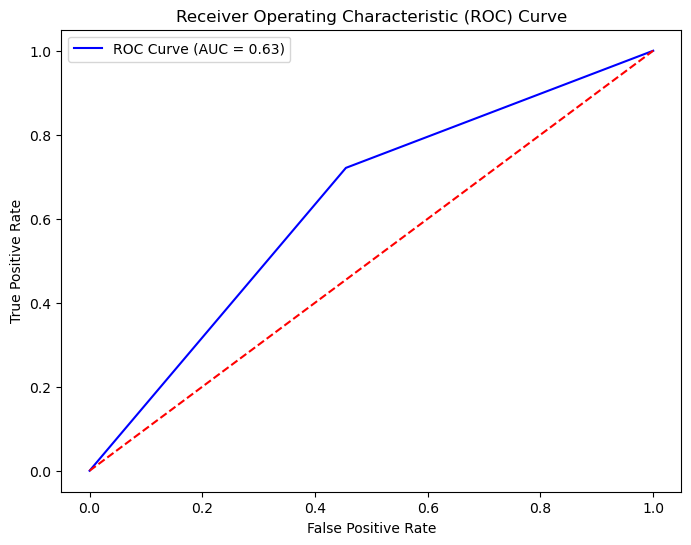

In [64]:
clf = DecisionTreeClassifier(max_depth=None)
clf.fit(X_train,y_train)
y_train_preds = clf.predict(X_train)
y_test_preds = clf .predict(X_test)

decision = round(recall_score(y_test, y_test_preds))
accuracy_decisiontree = accuracy_score(y_test_preds, y_test)

#The fpr and tpr 
fpr, tpr, _ = roc_curve(y_test, y_test_preds)
auc = roc_auc_score(y_test, y_test_preds)

print("Train Accuracy:", clf.score(X_train, y_train))
print("Accuracy score:", accuracy_decisiontree)

print("Classification Report:\n", classification_report(y_test, y_test_preds))

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Accuracy of 100% shows overfitting   
Test Accuracy =65% lower than 100 % showingg overfitting   
precison57% of 0 & 70% of 1 were predicted correctly   
recall;56% of actual 0 & 71% of actual 1 were predicted   correctly  
  
<u>Next Steps </u>
 - Handling Class imbalance using SMOTE to perform over-sampling
 -  using lasso and ridge to address overfitting 

random forest classifier  
improve prediction and reduce overfitting 

In [48]:
#droppig some columns to address
X = ['Discount_offered', 'Weight_in_gms', 'Cost_of_the_Product', 
  'Customer_care_calls', 'Prior_purchases','Gender_M','Warehouse_block_A']
X_selected =df[X]
print(X_selected.head())

   Discount_offered  Weight_in_gms  Cost_of_the_Product  Customer_care_calls  \
0                44           1233                  177                    4   
1                59           3088                  216                    4   
2                48           3374                  183                    2   
3                10           1177                  176                    3   
4                46           2484                  184                    2   

   Prior_purchases  Gender_M  Warehouse_block_A  
0                3       0.0                0.0  
1                2       1.0                0.0  
2                4       1.0                1.0  
3                4       1.0                0.0  
4                3       0.0                0.0  


Logistic  regression of our X_Selected 

Train Accuracy: 0.6395044891464939
Accuracy score: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.56      0.56       895
           1       0.70      0.70      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



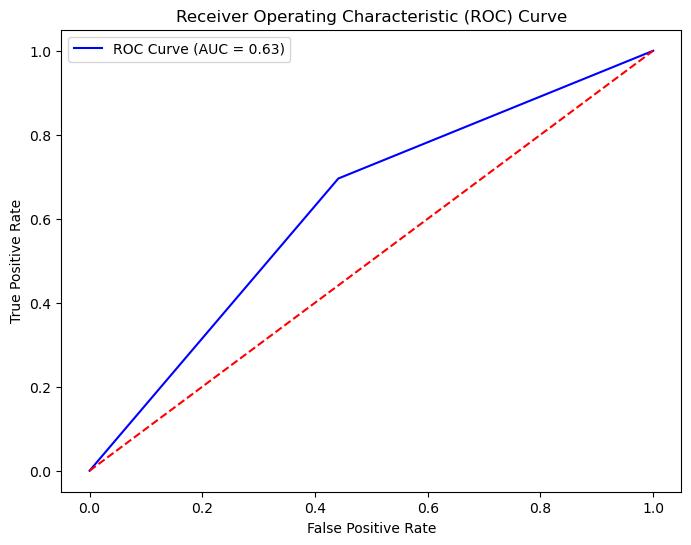

In [62]:
#Train test split using the new selected_x Set
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

y_pred =model.predict(X_test)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

new_selected_Logistic = accuracy_score(y_pred, y_test)

#The fpr and tpr 
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)


print("Train Accuracy:", model.score(X_train, y_train))
print("Accuracy score:",new_selected_Logistic)

print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Train Accuracy: 1.0
Accuracy score : 0.6740909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.73      0.64       895
           1       0.77      0.64      0.70      1305

    accuracy                           0.67      2200
   macro avg       0.68      0.68      0.67      2200
weighted avg       0.69      0.67      0.68      2200



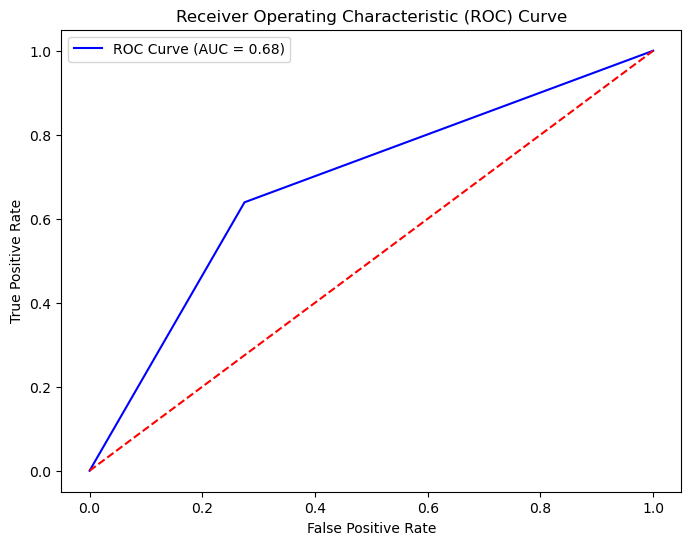

In [61]:
#Using SMOTE TO handle class imbalance
smote = SMOTE(random_state =42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Random forest
clf = RandomForestClassifier(n_estimators=100,random_state=42,class_weight='balanced')
clf.fit(X_train_resampled, y_train_resampled )
y_pred = clf .predict(X_test)

Accuracy_random =accuracy_score(y_pred, y_test)

#The fpr and tpr 
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Train Accuracy:", clf.score(X_train_resampled, y_train_resampled))
print("Accuracy score :", Accuracy_random)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

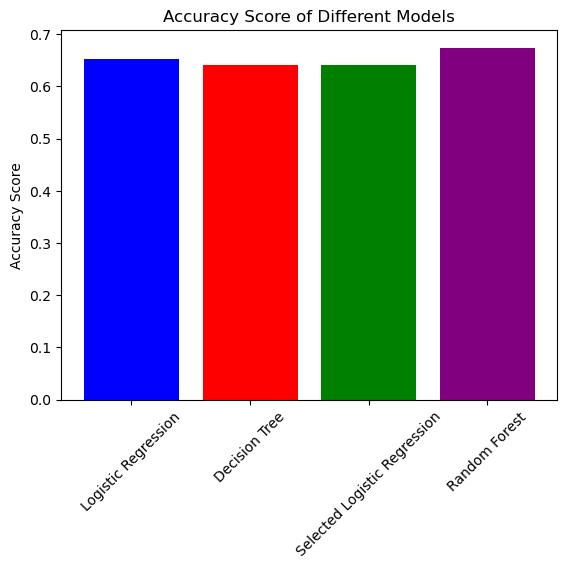

In [51]:
#Comparing the accuracy score of the models
accuracy = [accuracylogisticsklearn, accuracy_decisiontree, new_selected_Logistic, Accuracy_random]
labels = ['Logistic Regression', 'Decision Tree', 'Selected Logistic Regression', 'Random Forest']
plt.bar(labels, accuracy, color=['blue', 'red', 'green', 'purple'])
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score of Different Models')
plt.xticks(rotation=45)
plt.show()

In [52]:
#The Random Forest model has the highest accuracy score of 0.99 compared to the other models.Hence we will use it for evaluation

#### Evaluating the reults

In [53]:
#Confusion matrix of our Random Forest model
cm = confusion_matrix(y_test, y_pred)
cm

array([[649, 246],
       [471, 834]], dtype=int64)

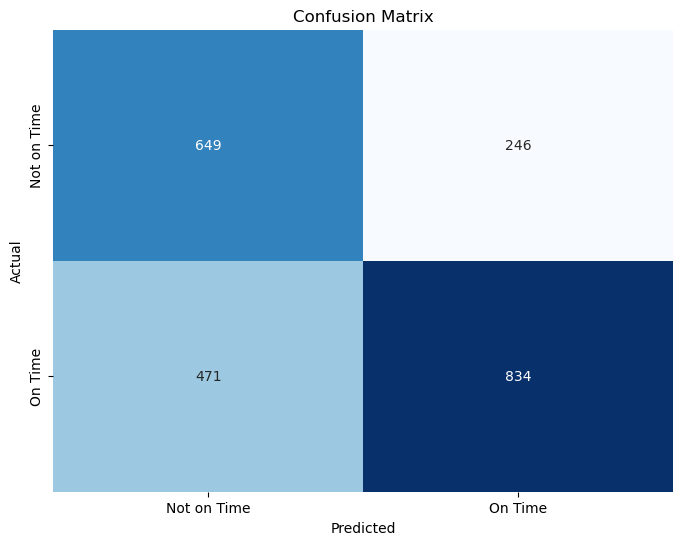

In [54]:
#Heat map of our confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=['Not on Time', 'On Time'], yticklabels=['Not on Time', 'On Time']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')   
plt.show()

In [55]:
#calculating the results 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Confusion Matrix:
[[649 246]
 [471 834]]
Accuracy: 0.6740909090909091
Precision: 0.7722222222222223
Recall: 0.639080459770115
F1-Score: 0.6993710691823899


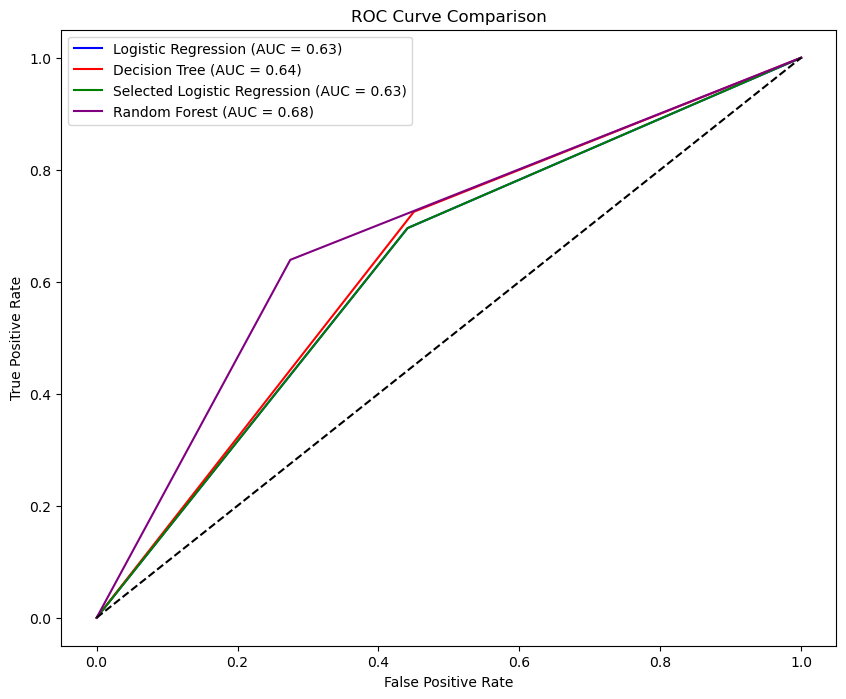

In [66]:
# Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, clf.predict(X_test))
auc_log = roc_auc_score(y_test, clf.predict(X_test))

# Decision Tree
clf_dt = DecisionTreeClassifier(max_depth=None)
clf_dt.fit(X_train, y_train)
fpr_dt, tpr_dt, _ = roc_curve(y_test, clf_dt.predict(X_test))
auc_dt = roc_auc_score(y_test, clf_dt.predict(X_test))

# Selected_Logistic Regression
model_sel_log = LogisticRegression(max_iter=1000)
model_sel_log.fit(X_train, y_train)
fpr_sel_log, tpr_sel_log, _ = roc_curve(y_test, model_sel_log.predict(X_test))
auc_sel_log = roc_auc_score(y_test, model_sel_log.predict(X_test))

# Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf_rf.fit(X_train_resampled, y_train_resampled)
fpr_rf, tpr_rf, _ = roc_curve(y_test, clf_rf.predict(X_test))
auc_rf = roc_auc_score(y_test, clf_rf.predict(X_test))

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log,tpr_log,label=f'Logistic Regression (AUC = {auc_log:.2f})', color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='red')
plt.plot(fpr_sel_log, tpr_sel_log, label=f'Selected Logistic Regression (AUC = {auc_sel_log:.2f})', color='green')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='purple')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

**Model Performance**:  
    - The Random Forest model had the highest accuracy score , indicating it is the best-performing model among those tested.  
    - The confusion matrix and classification report show that the model has a good balance between precision and recall, with a precision of 0.77 and a recall of 0.64.  
    - The ROC curve comparison shows that the Random Forest model has the highest AUC score, indicating better performance in distinguishing between classes.  

**Recommendations**:  
    - Focus on improving the delivery process to ensure more products are delivered on time.  
    - Enhance customer care services to address queries effectively, which may contribute to timely deliveries.  
    - Prioritize products with high importance to ensure they are delivered on time, as this has shown to improve delivery performance.  